In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, compiler, circuit
import math
import time

import QuantumPartonShower as qps
import QuantumPartonShower_remeasurement as qpsr
import QuantumPartonShower_partialreset as qpspr
import QuantumPartonShower_single_hRegcl as qpssh
import QuantumPartonShower_single_hRegcl_AllResetsOperational_worksfor2step as qpsshsp
import qps_inbetween as qpsi

In [13]:
simulator = Aer.get_backend('qasm_simulator')

qps1= qps.QuantumPartonShower(3, 1)
qps2= qps.QuantumPartonShower(3, 1)

eps= 0.001
g_1= 2
g_2= 1
#g_12= 1
initialParticles= ['001']
#initialParticles= [[0, 0, 1]]

shots= 5000

#print(qps1.pReg)
#qps1._circuit.draw()

t1= time.time()
qc, qubits= qps1.createCircuit(eps, g_1, g_2, 1, initialParticles)
print('Qubits: ' + str(qc.num_qubits))
print('Gates: ' + str(qc.count_ops()))
counts= qps1.simulate('qasm', shots=shots, position=False)
t2= time.time()
print('Simulation with FULL hRegister measurement-reset: %.6f\n\n' %(t2 - t1))

t1= time.time()
qc2, qubits2= qps2.createCircuit(eps, g_1, g_2, 0, initialParticles)
print('Qubits: ' + str(qc2.num_qubits))
print('Gates: ' + str(qc2.count_ops()))
counts2= qps2.simulate('qasm', shots=shots, position=False)
t2= time.time()
print('Simulation with FULL hRegister measurement-reset: %.6f\n\n' %(t2 - t1))

#print('Number of qubits: ' + str(qc.num_qubits))
#print(qubits)
#print(qps1.flatten(list(qubits.values())))
#print(list(qubits.values()))


m= 0
k:  0

m= 1
k:  0
k:  1

m= 2
k:  0
k:  1
k:  2
generated circuit on 11 qubits
Qubits: 54
Gates: OrderedDict([('ccx', 3376), ('x', 2962), ('cry', 208), ('cx', 63), ('ch', 6)])
Simulation with FULL hRegister measurement-reset: 6.077374



m= 0
k:  0

m= 1
k:  0
k:  1

m= 2
k:  0
k:  1
k:  2
generated circuit on 11 qubits
Qubits: 54
Gates: OrderedDict([('ccx', 3376), ('x', 2962), ('cry', 208), ('cx', 63), ('ch', 6)])
Simulation with FULL hRegister measurement-reset: 4.724598




0 00 00 00 0000 00 00 00 0 00 01 000 001 101 00000 0 phi f2 3
1 00 00 00 0000 00 00 00 0 10 01 111 101 101 00000 af2 f2 f2 10
2 00 00 00 0000 00 00 00 0 10 01 101 111 100 00000 f2 af2 f1 91
3 00 00 00 0000 00 00 00 0 10 01 111 100 100 00000 af2 f1 f1 98
4 00 00 00 0000 00 00 00 0 10 01 100 111 101 00000 f1 af2 f2 14
5 00 00 00 0000 00 00 00 0 10 01 111 100 101 00000 af2 f1 f2 13
6 00 00 00 0000 00 00 00 0 01 00 001 000 101 00000 phi 0 f2 28
7 00 00 00 0000 00 00 00 0 10 01 110 100 101 00000 af1 f1 f2 56
8 00 00 00 0000 00 00 00 0 10 01 101 110 101 00000 f2 af1 f2 11
9 00 00 00 0000 00 00 00 0 10 01 101 110 100 00000 f2 af1 f1 99
10 00 00 00 0000 00 00 00 0 10 01 100 110 101 00000 f1 af1 f2 60
11 00 00 00 0000 00 00 00 0 10 01 100 111 100 00000 f1 af2 f1 101
12 00 00 00 0000 00 00 00 0 10 01 110 100 100 00000 af1 f1 f1 362
13 00 00 00 0000 00 00 00 0 10 01 100 110 100 00000 f1 af1 f1 379
14 00 00 00 0000 00 00 00 0 10 01 110 101 101 00000 af1 f2 f2 14
15 00 00 00 0000 00 00 00 0 01 01 0

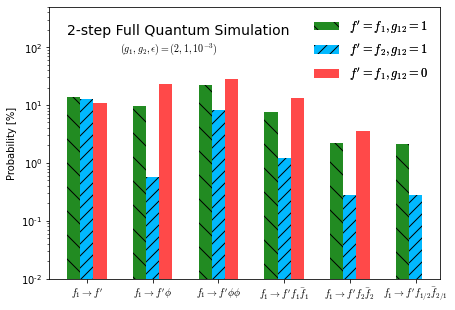

74.44
[0, 0, 0.7170000000000001, 0.28300000000000003]


In [254]:
qps1.bar_plot(counts, shots, eps, g_1, g_2, counts2)

/Users/PDeliyannis/Documents/QubitResetDir/QuantumPartonShower/QuantumPartonShower.py:950: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax = f.add_subplot(1, 1, 1)


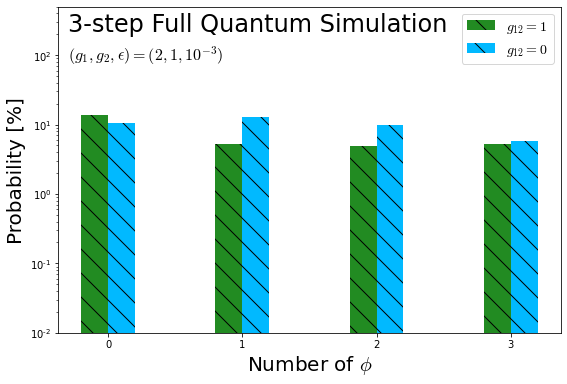

In [14]:
#print(len(counts))
#for c in counts:
#    print(c)
    
#qps1.bar_plot(counts, shots, eps, g_1, g_2, counts2)
qps1.bar_plot3(counts, shots, eps, g_1, g_2, counts2= counts2)
#qc.draw()

In [16]:
qps1= qps.QuantumPartonShower(3, 1)
#qps2= qpssh.QuantumPartonShower(3, 1)
#qps2= qpspr.QuantumPartonShower(2, 1)

eps= 0.001
g_1= 2
g_2= 1
#g_12= 1
initialParticles= ['001']

shots= 10

#print(qps1.pReg)
#qps1._circuit.draw()

t1= time.time()
qc, qubits= qps1.createCircuit(eps, g_1, g_2, 1, initialParticles)
print('Qubits: ' + str(qc.num_qubits))
print('Gates: ' + str(qc.count_ops()))
counts= qps1.simulate('qasm', shots=shots, position=False)
t2= time.time()
print('Simulation with FULL hRegister measurement-reset: %.6f\n\n' %(t2 - t1))

#t1= time.time()
#qc2, qubits2= qps2.createCircuit(eps, g_1, g_2, 1, initialParticles)
#print('Qubits: ' + str(qc2.num_qubits))
#print('Gates: ' + str(qc2.count_ops()))
#counts2= qps2.simulate('qasm', shots=shots, position=False)
#t2= time.time()
#print('Simulation with SEPARATED hRegister measurement-reset: %.6f\n\n' %(t2 - t1))




#print('Number of qubits: ' + str(qc.num_qubits))
#print(qubits)
#print(qps1.flatten(list(qubits.values())))
#print(list(qubits.values()))


m= 0
k:  0

m= 1
k:  0
k:  1

m= 2
k:  0
k:  1
k:  2
generated circuit on 11 qubits
Qubits: 54
Gates: OrderedDict([('ccx', 3376), ('x', 2962), ('cry', 208), ('cx', 63), ('ch', 6)])
Simulation with FULL hRegister measurement-reset: 5.521310




0 00 00 00 00 00 00 00 11 1001 111 101 101 00000 af2 f2 f2 14
1 00 00 00 00 00 00 00 01 0001 000 001 101 00000 0 phi f2 3
2 00 00 00 00 00 00 00 11 1001 101 110 101 00000 f2 af1 f2 9
3 00 00 00 00 00 00 00 11 1001 100 111 100 00000 f1 af2 f1 91
4 00 00 00 00 00 00 00 11 1001 101 111 101 00000 f2 af2 f2 18
5 00 00 00 00 00 00 00 11 1001 101 111 100 00000 f2 af2 f1 89
6 00 00 00 00 00 00 00 11 1001 110 101 101 00000 af1 f2 f2 13
7 00 00 00 00 00 00 00 10 0100 001 000 101 00000 phi 0 f2 26
8 00 00 00 00 00 00 00 11 1001 110 101 100 00000 af1 f2 f1 93
9 00 00 00 00 00 00 00 11 1001 100 111 101 00000 f1 af2 f2 17
10 00 00 00 00 00 00 00 11 0101 001 001 101 00000 phi phi f2 388
11 00 00 00 00 00 00 00 11 1001 110 100 101 00000 af1 f1 f2 69
12 00 00 00 00 00 00 00 11 1001 111 101 100 00000 af2 f2 f1 98
13 00 00 00 00 00 00 00 10 0100 001 000 100 00000 phi 0 f1 474
14 00 00 00 00 00 00 00 00 0000 000 000 100 00000 0 0 f1 697
15 00 00 00 00 00 00 00 11 1001 111 100 101 00000 af2 f1 f2 17
16 00 

/Users/PDeliyannis/Documents/QubitResetDir/QuantumPartonShower/QuantumPartonShower_single_hRegcl.py:1211: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


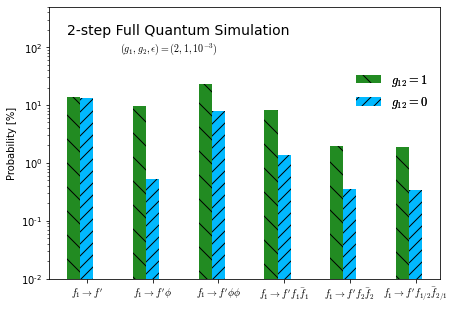

73.96000000000001
[0, 0, 0.726, 0.274]
0 00 00 00 00 00 00 00 0 10 01 111 101 101 00000 af2 f2 f2 18
1 00 00 00 00 00 00 00 0 10 01 100 111 101 00000 f1 af2 f2 14
2 00 00 00 00 00 00 00 0 10 01 111 100 101 00000 af2 f1 f2 15
3 00 00 00 00 00 00 00 0 01 00 001 000 101 00000 phi 0 f2 22
4 00 00 00 00 00 00 00 0 10 01 110 100 101 00000 af1 f1 f2 76
5 00 00 00 00 00 00 00 0 10 01 110 100 100 00000 af1 f1 f1 402
6 00 00 00 00 00 00 00 0 10 01 100 111 100 00000 f1 af2 f1 92
7 00 00 00 00 00 00 00 0 10 01 101 110 101 00000 f2 af1 f2 18
8 00 00 00 00 00 00 00 0 10 01 101 110 100 00000 f2 af1 f1 85
9 00 00 00 00 00 00 00 0 10 01 110 101 100 00000 af1 f2 f1 108
10 00 00 00 00 00 00 00 0 10 01 101 111 101 00000 f2 af2 f2 13
11 00 00 00 00 00 00 00 0 10 01 100 110 100 00000 f1 af1 f1 405
12 00 00 00 00 00 00 00 0 10 01 100 110 101 00000 f1 af1 f2 56
13 00 00 00 00 00 00 00 0 01 00 001 000 100 00000 phi 0 f1 489
14 00 00 00 00 00 00 00 0 10 01 110 101 101 00000 af1 f2 f2 10
15 00 00 00 00 00 00 00 

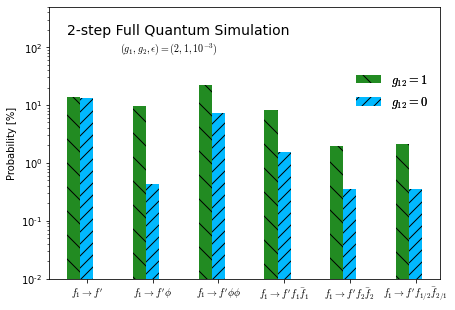

74.6
[0, 0, 0.713, 0.287]


In [94]:
#print(len(counts))
#for c in counts:
#    print(c)
    
#print(len(counts2))
#for c in counts2:
#    print(c)
    
qps1.bar_plot(counts, shots, eps, g_1, g_2)
qps2.bar_plot(counts2, shots, eps, g_1, g_2)
#qps1.bar_plot3(counts, shots, eps, g_1, g_2, counts2= counts2)

In [5]:
#qps1= qps.QuantumPartonShower(2, 1, 0)
#qps1= qpssh.QuantumPartonShower(2, 1)
#qps1= qpsi.QuantumPartonShower(2, 1)
qps1= qpsshsp.QuantumPartonShower(2, 1)
#qps2= qpspr.QuantumPartonShower(2, 1)

eps= 0.001
g_1= 2
g_2= 1
#g_12= 1
initialParticles= ['100']
#initialParticles2= ['001']

shots= 2000

#print(qps1.pReg)
#qps1._circuit.draw()

qc, qubits= qps1.createCircuit(eps, g_1, g_2, 1, initialParticles)
print('Qubits: ' + str(qc.num_qubits))
print('Clbits: ' + str(qc.num_clbits))
print('Gates: ' + str(qc.count_ops()))
print(qc.draw())

t1= time.time()
counts= qps1.simulate('qasm', shots=shots, position=False)
#simulator = Aer.get_backend('qasm_simulator')
#counts= execute(qc, simulator, shots=1000).result().get_counts()
t2= time.time()
print('Simulation with FULL hRegister measurement-reset: %.6f\n\n' %(t2 - t1))

#t1= time.time()
#qc2, qubits2= qps2.createCircuit(eps, g_1, g_2, 1, initialParticles2)
#print('Qubits: ' + str(qc2.num_qubits))
#print('Gates: ' + str(qc2.count_ops()))
#counts2= qps2.simulate('qasm', shots=shots, position=False)
#t2= time.time()
#print('Simulation with SEPARATED hRegister measurement-reset: %.6f\n\n' %(t2 - t1))



m= 0


Apply uCount()...
Apply uE()...
	hmap= {(1, 0): [[]]}
		n_tot, n_phi= 1, 0
Apply U_h()...
	hmap= {(1, 0): [[]]}
	k:  0
		 n_tot, n_phi= (1, 0)
		 h_bool= None
		 h_bool= None
			 n_a= 0
0 0 1
			 n_a= 1
0 1 0
Measure and reset |h>...
Apply U_p()...
[['00'], ['01']]
[['01']]


m= 1


Apply uCount()...
Apply uE()...
	hmap= {(1, 0): [['00']], (2, 1): [['01']]}
		n_tot, n_phi= 1, 0
		n_tot, n_phi= 2, 1
Apply U_h()...
	hmap= {(1, 0): [['00']], (2, 1): [['01']]}
	k:  1
		 n_tot, n_phi= (1, 0)
		 h_bool= [0]
		 h_bool= [0]
			 n_a= 0
0 0 1
			 n_a= 1
0 1 0
		 n_tot, n_phi= (2, 1)
		 h_bool= [1]
		 h_bool= [1]
			 n_a= 0
1 0 1
			 n_a= 1
1 1 0
	hmap= {(1, 0): [[]]}
	k:  0
		 n_tot, n_phi= (1, 0)
		 h_bool= None
		 h_bool= None
			 n_a= 0
0 0 1
			 n_a= 1
0 1 0
Measure and reset |h>...
Apply U_p()...
[['00', '00'], ['01', '00'], ['00', '01'], ['01', '01'], ['10', '01']]
[['01', '00'], ['01', '01']]
[['00', '00'], ['01', '00'], ['00', '01'], ['01', '01'], ['10', '01']]
[['10', '01']]
ge

Simulation with FULL hRegister measurement-reset: 6.397488




In [32]:
#print(len(qc.data))
for j in range(len(qc.data)):
#for j in range(10):
    for qubit in qc.data[j][1]:
        #print(qubit)
        #print(qubit.register)
        if qubit.register.name == 'n_phi':
            print('Hey! ' + str(qc.data[j]))
        if qubit.register.name == 'n_b':
            print('Hey! ' + str(qc.data[j]))
        if qubit.register.name == 'w_phi':
            print('Hey! ' + str(qc.data[j]))
        if qubit.register.name == 'w_b':
            print('Hey! ' + str(qc.data[j]))

Hey! (<qiskit.circuit.measure.Measure object at 0x7f8722f022b0>, [Qubit(QuantumRegister(2, 'n_phi'), 0)], [Clbit(ClassicalRegister(2, 'nphi_cl'), 0)])
Hey! (<qiskit.circuit.measure.Measure object at 0x7f8722f022b0>, [Qubit(QuantumRegister(2, 'n_phi'), 1)], [Clbit(ClassicalRegister(2, 'nphi_cl'), 1)])
Hey! (<qiskit.circuit.measure.Measure object at 0x7f8722f02250>, [Qubit(QuantumRegister(2, 'n_b'), 0)], [Clbit(ClassicalRegister(2, 'nb_cl'), 0)])
Hey! (<qiskit.circuit.measure.Measure object at 0x7f8722f02250>, [Qubit(QuantumRegister(2, 'n_b'), 1)], [Clbit(ClassicalRegister(2, 'nb_cl'), 1)])
Hey! (<qiskit.circuit.measure.Measure object at 0x7f8722f02310>, [Qubit(QuantumRegister(2, 'w_phi'), 0)], [Clbit(ClassicalRegister(2, 'wphi_cl'), 0)])
Hey! (<qiskit.circuit.measure.Measure object at 0x7f8722f02310>, [Qubit(QuantumRegister(2, 'w_phi'), 1)], [Clbit(ClassicalRegister(2, 'wphi_cl'), 1)])
Hey! (<qiskit.circuit.measure.Measure object at 0x7f8722f02370>, [Qubit(QuantumRegister(2, 'w_b'), 0)]

<ipython-input-32-eb58f254e47b>:7: DeprecationWarning: Back-references to from Bit instances to their containing Registers have been deprecated. Instead, inspect Registers to find their contained Bits.
  if qubit.register.name == 'n_phi':
<ipython-input-32-eb58f254e47b>:9: DeprecationWarning: Back-references to from Bit instances to their containing Registers have been deprecated. Instead, inspect Registers to find their contained Bits.
  if qubit.register.name == 'n_b':
<ipython-input-32-eb58f254e47b>:11: DeprecationWarning: Back-references to from Bit instances to their containing Registers have been deprecated. Instead, inspect Registers to find their contained Bits.
  if qubit.register.name == 'w_phi':
<ipython-input-32-eb58f254e47b>:13: DeprecationWarning: Back-references to from Bit instances to their containing Registers have been deprecated. Instead, inspect Registers to find their contained Bits.
  if qubit.register.name == 'w_b':


In [7]:
simulator = Aer.get_backend('qasm_simulator')

q= QuantumRegister(8)
cl= ClassicalRegister(8)
qc= QuantumCircuit(q, cl)
qc.add_register(QuantumRegister(15))

qc.x(1)
qc.cry(-1.1071, 3, 2)
qc.cry(-1.1071, 3, 2)
qc.cry(-1.1071, 1, 0)
qc.cry(-1.1071, 1, 0)
qc.cry(-1.1071, 5, 4)
qc.cry(-1.1071, 5, 4)
qc.measure(6, 6)
qc.measure(7, 7)
qc.reset(6)
qc.reset(7)
qc.measure(6, 6)
qc.measure(7, 7)
qc.reset(6)
qc.reset(7)
qc.draw()

qc.measure(qc.qubits[:6], cl[:6])
counts= execute(qc, simulator, shots=1000).result().get_counts()
print(counts)
qc.draw()

{'00000010': 216, '00000011': 784}


┌─────────────┐┌─────────────┐                         »
 q71_0: ───────────────┤ Ry(-1.1071) ├┤ Ry(-1.1071) ├─────────────────────────»
             ┌───┐     └──────┬──────┘└──────┬──────┘                         »
 q71_1: ─────┤ X ├────────────■──────────────■────────────────────────────────»
        ┌────┴───┴────┐┌─────────────┐                       ┌─┐              »
 q71_2: ┤ Ry(-1.1071) ├┤ Ry(-1.1071) ├───────────────────────┤M├──────────────»
        └──────┬──────┘└──────┬──────┘                       └╥┘┌─┐           »
 q71_3: ───────■──────────────■───────────────────────────────╫─┤M├───────────»
        ┌─────────────┐┌─────────────┐                        ║ └╥┘┌─┐        »
 q71_4: ┤ Ry(-1.1071) ├┤ Ry(-1.1071) ├────────────────────────╫──╫─┤M├────────»
        └──────┬──────┘└──────┬──────┘                        ║  ║ └╥┘┌─┐     »
 q71_5: ───────■──────────────■───────────────────────────────╫──╫──╫─┤M├─────»
              ┌─┐                                    ┌─┐      ║  ║  ║ └╥┘     »
 q71_6: ──────┤M├────────────|0>─────────────────────┤M├─|0>──╫──╫──╫──╫──────»
              └╥┘            ┌─┐                     └╥┘ ┌─┐  ║  ║  ║  ║      »
 q71_7: ───────╫─────────────┤M├────────────|0>───────╫──┤M├──╫──╫──╫──╫──|0>─»
               ║             └╥┘                      ║  └╥┘  ║  ║  ║  ║      »
 q72_0: ───────╫──────────────╫───────────────────────╫───╫───╫──╫──╫──╫──────»
               ║              ║                       ║   ║   ║  ║  ║  ║      »
 q72_1: ───────╫──────────────╫───────────────────────╫───╫───╫──╫──╫──╫──────»
               ║              ║                       ║   ║   ║  ║  ║  ║      »
 q72_2: ───────╫──────────────╫───────────────────────╫───╫───╫──╫──╫──╫──────»
               ║              ║                       ║   ║   ║  ║  ║  ║      »
 q72_3: ───────╫──────────────╫───────────────────────╫───╫───╫──╫──╫──╫──────»
               ║              ║                       ║   ║   ║  ║  ║  ║      »
 q72_4: ───────╫──────────────╫───────────────────────╫───╫───╫──╫──╫──╫──────»
               ║              ║                       ║   ║   ║  ║  ║  ║      »
 q72_5: ───────╫──────────────╫───────────────────────╫───╫───╫──╫──╫──╫──────»
               ║              ║                       ║   ║   ║  ║  ║  ║      »
 q72_6: ───────╫──────────────╫───────────────────────╫───╫───╫──╫──╫──╫──────»
               ║              ║                       ║   ║   ║  ║  ║  ║      »
 q72_7: ───────╫──────────────╫───────────────────────╫───╫───╫──╫──╫──╫──────»
               ║              ║                       ║   ║   ║  ║  ║  ║      »
 q72_8: ───────╫──────────────╫───────────────────────╫───╫───╫──╫──╫──╫──────»
               ║              ║                       ║   ║   ║  ║  ║  ║      »
 q72_9: ───────╫──────────────╫───────────────────────╫───╫───╫──╫──╫──╫──────»
               ║              ║                       ║   ║   ║  ║  ║  ║      »
q72_10: ───────╫──────────────╫───────────────────────╫───╫───╫──╫──╫──╫──────»
               ║              ║                       ║   ║   ║  ║  ║  ║      »
q72_11: ───────╫──────────────╫───────────────────────╫───╫───╫──╫──╫──╫──────»
               ║              ║                       ║   ║   ║  ║  ║  ║      »
q72_12: ───────╫──────────────╫───────────────────────╫───╫───╫──╫──╫──╫──────»
               ║              ║                       ║   ║   ║  ║  ║  ║      »
q72_13: ───────╫──────────────╫───────────────────────╫───╫───╫──╫──╫──╫──────»
               ║              ║                       ║   ║   ║  ║  ║  ║      »
q72_14: ───────╫──────────────╫───────────────────────╫───╫───╫──╫──╫──╫──────»
               ║              ║                       ║   ║   ║  ║  ║  ║      »
  c4: 8/═══════╩══════════════╩═══════════════════════╩═══╩═══╩══╩══╩══╩══════»
               6              7                       6   7   2  3  4  5      »
«        ┌─┐   
« q71_0: ┤M├───
«        └╥┘┌─┐
« q71_1: ─╫─┤M├
«         ║ └╥┘
« q71_2: ─╫──╫─
«      

0 00 00 00 00 00 00 00 0 1001 111 101 101 00000 af2 f2 f2 8
1 00 00 00 00 00 00 00 0 1001 111 100 101 00000 af2 f1 f2 6
2 00 00 00 00 00 00 00 0 1001 111 100 100 00000 af2 f1 f1 38
3 00 00 00 00 00 00 00 0 1001 110 100 101 00000 af1 f1 f2 22
4 00 00 00 00 00 00 00 0 0100 001 000 101 00000 phi 0 f2 13
5 00 00 00 00 00 00 00 0 1001 100 111 100 00000 f1 af2 f1 43
6 00 00 00 00 00 00 00 0 1001 101 110 101 00000 f2 af1 f2 6
7 00 00 00 00 00 00 00 0 1001 101 110 100 00000 f2 af1 f1 46
8 00 00 00 00 00 00 00 0 0000 000 000 100 00000 0 0 f1 287
9 00 00 00 00 00 00 00 0 1001 101 111 101 00000 f2 af2 f2 6
10 00 00 00 00 00 00 00 0 1001 110 101 100 00000 af1 f2 f1 45
11 00 00 00 00 00 00 00 0 1001 100 110 101 00000 f1 af1 f2 12
12 00 00 00 00 00 00 00 0 1001 110 100 100 00000 af1 f1 f1 150
13 00 00 00 00 00 00 00 0 1001 100 110 100 00000 f1 af1 f1 146
14 00 00 00 00 00 00 00 0 0000 000 000 101 00000 0 0 f2 290
15 00 00 00 00 00 00 00 0 0001 000 001 100 00000 0 phi f1 35
16 00 00 00 00 00 00 00 0 

/Users/PDeliyannis/Documents/QubitResetDir/QuantumPartonShower/QuantumPartonShower_single_hRegcl_AllResetsOperational_worksfor2step.py:1392: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_yscale("log", nonposy='clip')


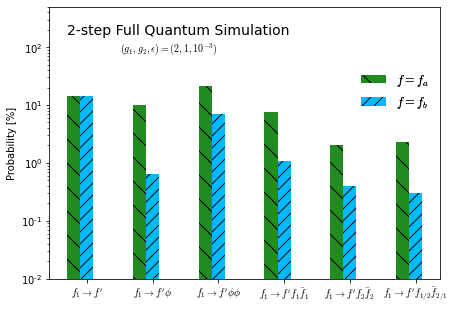

74.6
[0, 0, 0, 1.0]


In [10]:
qps1.bar_plot(counts, shots, eps, g_1, g_2)
#qps2.bar_plot(counts2, shots, eps, g_1, g_2)
#print('Number of qubits: ' + str(qc.num_qubits))
#print(qubits)
#print(qps1.flatten(list(qubits.values())))
#print(list(qubits.values()))

In [293]:
#gen= qpssh.QuantumPartonShower.gen_h(3, 2)
#print(str(gen) + '\n')
gen2= qpssh.QuantumPartonShower.gen_h_general(2, 2, 1)
gen22= []
print(gen2)
k= 1
for h in gen2:
    print(h)
    print(int(h[2-k], 2))
    if int(h[2-k], 2) != 0: gen22+= [h]
print(gen22)
#print(len(gen), len(gen2))
#hmap= qpssh.QuantumPartonShower.h_map(0, 2, [2])
#hmap2= qpssh.QuantumPartonShower.h_map_general(0, 2, [7, 5])
#for key in hmap:
#    n_tot, n_phi= key
#    print('n_tot, n_phi= ' + str((n_tot, n_phi)))
#    print('bool= ' + str(int(''.join(hmap[key][0]), 2)))
#    
#print(str(hmap) + '\n')
#print(hmap2)

[['00', '00'], ['01', '00'], ['00', '01'], ['01', '01'], ['10', '01']]
['00', '00']
0
['01', '00']
0
['00', '01']
1
['01', '01']
1
['10', '01']
1
[['00', '01'], ['01', '01'], ['10', '01']]


In [312]:
m= 2
L= 2
n_i= 2
k= 3
gen_h= qpssh.QuantumPartonShower.gen_h_general(m, L, n_i)

gen_h_allowed= []
for h in gen_h:
    if int(h[0], 2) == k: 
        gen_h_allowed+= [h]

print(gen_h)
print(gen_h_allowed)

[['00', '00'], ['01', '00'], ['10', '00'], ['00', '01'], ['01', '01'], ['10', '01'], ['11', '01'], ['00', '10'], ['01', '10'], ['10', '10'], ['11', '10']]
[['11', '01'], ['11', '10']]


In [9]:
eps= 0.001
g_1= 2
g_2= 1
g_12= 1
initialParticles= ['100']

qps2= qpssh.QuantumPartonShower(2, 1)

# calculate constants
gp = math.sqrt(abs((g_1 - g_2) ** 2 + 4 * g_12 ** 2))
if g_1 > g_2:
    gp = -gp
g_a, g_b = (g_1 + g_2 - gp) / 2, (g_1 + g_2 + gp) / 2
u = math.sqrt(abs((gp + g_1 - g_2) / (2 * gp)))

# evaluate P(Theta) and Delta(Theta) at every time step
timeStepList, P_aList, P_bList, P_phiList, Delta_aList, Delta_bList, Delta_phiList = [], [], [], [], [], [], []
qps2.populateParameterLists(qps2._N, timeStepList, P_aList, P_bList, P_phiList, Delta_aList, Delta_bList, Delta_phiList,
                       g_a,
                       g_b, eps)

qubits = {'pReg': qps2.pReg, 'hReg': qps2.hReg, 'w_hReg': qps2.w_hReg, 'eReg': qps2.eReg, 'wReg': qps2.wReg,
          'n_aReg': qps2.n_aReg, 'w_aReg': qps2.w_aReg}

qps2.initializeParticles(qps2._circuit, qps2.pReg, initialParticles)

(qps2.wReg_cl, qps2.pReg_cl, qps2.hReg_cl, qps2.eReg_cl, qps2.n_aReg_cl, qps2.w_hReg_cl, qps2.w_aReg_cl) = qps2.allocateClbits(qps2._N, qps2._ni, qps2._L)

qps2.add_Clbits()

for m in range(qps2._N):
    #print('\n\nm= %d\n\n' %(m))
    #l = int(math.floor(math.log(m + qps2._ni, 2)) + 1)

    # R^(m) - rotate every particle p_k from 1,2 to a,b basis (step 1)
    index = 0
    while index < qps2.pReg.size:
        qps2._circuit.cry((2 * math.asin(-u)), qps2.pReg[index + 2], qps2.pReg[index + 0])
        index += qps2._p_len

    # populate count register (step 2)
    #print('Apply uCount()...')
    #qps2.uCount(qps2._circuit, m, qps2._ni, l, qps2.pReg, qps2.wReg, qps2.n_aReg, qps2.w_aReg)

    
    #print('Apply uE()...')
    #qps2.uE(qps2._circuit, l, qps2._ni, m, qps2.n_aReg, qps2.w_aReg, qps2.wReg, qps2.eReg,
    #        Delta_phiList[m], Delta_aList[m], Delta_bList[m], initialParticles)
    
    print('Measure and reset |h>...')
    qps2._circuit.measure(qps2.hReg, qps2.hReg_cl[m*qps2._L : (m+1)*qps2._L])
    qps2._circuit.reset(qps2.hReg)
    
    
print('Qubits= ' + str(qps2._circuit.num_qubits))
print('Gates= ' + str(qps2._circuit.count_ops()))

shots= 10
t1= time.time()
counts= qps2.simulate('qasm', shots=shots, position=False)
t2= time.time()
print('Time to simulate uE() with 10 shots, and reduced qubits= ' + str(t2 - t1))

print('\n' + str(counts))
#qps2._circuit.draw()

Measure and reset |h>...
Measure and reset |h>...
Qubits= 23
Gates= OrderedDict([('cry', 6), ('measure', 4), ('reset', 4), ('x', 1)])
Time to simulate uE() with 10 shots, and reduced qubits= 21.078227996826172

{'00 00 00 0 0000 000 000 100 00000': 2, '00 00 00 0 0000 000 000 101 00000': 8}


In [3]:
eps= 0.001
g_1= 2
g_2= 1
g_12= 1
initialParticles= ['100']

qps2= qpsshsp.QuantumPartonShower(2, 1)

gp = math.sqrt(abs((g_1 - g_2) ** 2 + 4 * g_12 ** 2))
if g_1 > g_2:
    gp = -gp
g_a, g_b = (g_1 + g_2 - gp) / 2, (g_1 + g_2 + gp) / 2
u = math.sqrt(abs((gp + g_1 - g_2) / (2 * gp)))

# evaluate P(Theta) and Delta(Theta) at every time step
timeStepList, P_aList, P_bList, P_phiList, Delta_aList, Delta_bList, Delta_phiList = [], [], [], [], [], [], []
qps2.populateParameterLists(qps2._N, timeStepList, P_aList, P_bList, P_phiList, Delta_aList, Delta_bList, Delta_phiList,
                       g_a,
                       g_b, eps)

qubits = {'pReg': qps2.pReg, 'hReg': qps2.hReg, 'w_hReg': qps2.w_hReg, 'eReg': qps2.eReg, 'wReg': qps2.wReg,
          'n_aReg': qps2.n_aReg, 'w_aReg': qps2.w_aReg, 'n_bReg': qps2.n_bReg, 'w_bReg': qps2.w_bReg,
          'n_phiReg': qps2.n_phiReg, 'w_phiReg': qps2.w_phiReg}

qps2.initializeParticles(qps2._circuit, qps2.pReg, initialParticles)

(qps2.wReg_cl, qps2.pReg_cl, qps2.hReg_cl, qps2.eReg_cl, qps2.n_phiReg_cl, qps2.n_aReg_cl,
 qps2.n_bReg_cl, qps2.w_hReg_cl, qps2.w_phiReg_cl, qps2.w_aReg_cl, qps2.w_bReg_cl) = qps2.allocateClbits(qps2._N, qps2._ni, qps2._L)

qps2.add_Clbits()

# begin stepping through subcircuits
for m in range(qps2._N):
    print('\n\nm= %d\n\n' %(m))
    l = int(math.floor(math.log(m + qps2._ni, 2)) + 1)

    # R^(m) - rotate every particle p_k from 1,2 to a,b basis (step 1)
    index = 0
    while index < qps2.pReg.size:
        qps2._circuit.cry((2 * math.asin(-u)), qps2.pReg[index + 2], qps2.pReg[index + 0])
        index += qps2._p_len

    # populate count register (step 2)
    print('Apply uCount()...')
    #qps2.uCount(qps2._circuit, m, qps2._ni, l, qps2.pReg, qps2.wReg, qps2.n_aReg, qps2.w_aReg, qps2.n_bReg,
    #            qps2.w_bReg, qps2.n_phiReg, qps2.w_phiReg)
    qps2.uCount_old(qps2._circuit, m, qps2._ni, l, qps2.pReg, qps2.wReg, qps2.n_aReg, qps2.w_aReg, qps2.n_bReg,
                qps2.w_bReg, qps2.n_phiReg, qps2.w_phiReg)

    # assess if emmision occured (step 3)
    print('Apply uE()...')
    qps2.uE(qps2._circuit, l, qps2._ni, m, qps2.n_aReg, qps2.w_aReg, qps2.wReg, qps2.eReg,
            Delta_phiList[m], Delta_aList[m], Delta_bList[m], initialParticles)
    

    #print('Apply U_h()...')
    #qps2.U_h(qps2._circuit, l, qps2._ni, m, qps2.n_phiReg, qps2.w_phiReg, qps2.n_aReg, qps2.w_aReg, qps2.n_bReg,
    #         qps2.w_bReg, qps2.wReg, qps2.eReg, qps2.pReg, qps2.hReg, qps2.w_hReg,
    #    P_phiList[m], P_aList[m], P_bList[m], initialParticles)


    #print('Measure and reset |h>...')
    qps2._circuit.measure(qps2.hReg, qps2.hReg_cl[m*qps2._L : (m+1)*qps2._L])
    qps2._circuit.reset(qps2.hReg)

    #print('Apply U_p()...')
    # update particle based on which particle split/emmitted (step 5)
    #qps2.U_p(qps2._circuit, l, qps2._ni, m, qps2.pReg, qps2.hReg, qps2.w_hReg, qps2.wReg, g_a, g_b)
    #qps2.U_p_new(qps2._circuit, l, qps2._ni, m, qps2.pReg, qps2.wReg, qps2.hReg_cl, g_a, g_b)


    # R^-(m) rotate every particle p_k from a,b to 1,2 basis (step 6)
    #index2 = 0
    #while index2 < qps2.pReg.size:
        # circuit.append(ry(2*math.asin(u)).controlled().on(p_k[2], p_k[0]))
    #    qps2._circuit.cry((2 * math.asin(u)), qps2.pReg[index2 + 2], qps2.pReg[index2 + 0])
    #    index2 += qps2._p_len

    
    
print('Qubits= ' + str(qps2._circuit.num_qubits))
print('Gates= ' + str(qps2._circuit.count_ops()))

shots= 1000
t1= time.time()
counts= qps2.simulate('qasm', shots=shots, position=False)
t2= time.time()
print('Time to simulate uE() with 10 shots, and un-reduced qubits= ' + str(t2 - t1))#

print('\n' + str(counts))



m= 0


Apply uCount()...
Apply uE()...
	hmap= {(1, 0): [[]]}
		n_tot, n_phi= 1, 0


m= 1


Apply uCount()...
Apply uE()...
	hmap= {(1, 0): [['00']], (2, 1): [['01']]}
		n_tot, n_phi= 1, 0
		n_tot, n_phi= 2, 1
Qubits= 31
Gates= OrderedDict([('x', 75), ('ccx', 56), ('cry', 12), ('cx', 9), ('measure', 4), ('reset', 4)])
Time to simulate uE() with 10 shots, and un-reduced qubits= 1.4546728134155273

{'00 00 00 00 00 10 00 0 0000 000 000 100 00000': 70, '00 00 00 00 10 00 00 1 0000 000 000 101 00000': 28, '00 00 00 00 01 01 00 1 0000 000 000 100 00000': 68, '00 00 00 00 01 01 00 0 0000 000 000 101 00000': 110, '00 00 00 00 01 01 00 0 0000 000 000 100 00000': 1, '00 00 00 00 10 00 00 0 0000 000 000 101 00000': 169, '00 00 00 00 00 10 00 1 0000 000 000 100 00000': 466, '00 00 00 00 01 01 00 1 0000 000 000 101 00000': 88}


In [4]:
eps= 0.001
g_1= 2
g_2= 1
g_12= 1
initialParticles= ['100']

qps22= qpsshsp.QuantumPartonShower(2, 1)

qps22.createCircuit(eps, g_1, g_2, g_12, initialParticles)

print('Qubits= ' + str(qps22._circuit.num_qubits))
print('Gates= ' + str(qps22._circuit.count_ops()))

shots= 1000
t1= time.time()
counts2= qps22.simulate('qasm', shots=shots, position=False)
t2= time.time()
print('Time to simulate uE() with 10 shots, and un-reduced qubits= ' + str(t2 - t1))

print('\n' + str(counts))



m= 0


Apply uCount()...
Apply uE()...
	hmap= {(1, 0): [[]]}
		n_tot, n_phi= 1, 0
Apply U_h()...
	hmap= {(1, 0): [[]]}
	k:  0
		 n_tot, n_phi= (1, 0)
		 h_bool= None
		 h_bool= None
			 n_a= 0
0 0 1
			 n_a= 1
0 1 0
Measure and reset |h>...
Apply U_p()...
[['00'], ['01']]
[['01']]


m= 1


Apply uCount()...
Apply uE()...
	hmap= {(1, 0): [['00']], (2, 1): [['01']]}
		n_tot, n_phi= 1, 0
		n_tot, n_phi= 2, 1
Apply U_h()...
	hmap= {(1, 0): [['00']], (2, 1): [['01']]}
	k:  1
		 n_tot, n_phi= (1, 0)
		 h_bool= [0]
		 h_bool= [0]
			 n_a= 0
0 0 1
			 n_a= 1
0 1 0
		 n_tot, n_phi= (2, 1)
		 h_bool= [1]
		 h_bool= [1]
			 n_a= 0
1 0 1
			 n_a= 1
1 1 0
	hmap= {(1, 0): [[]]}
	k:  0
		 n_tot, n_phi= (1, 0)
		 h_bool= None
		 h_bool= None
			 n_a= 0
0 0 1
			 n_a= 1
0 1 0
Measure and reset |h>...
Apply U_p()...
[['00', '00'], ['01', '00'], ['00', '01'], ['01', '01'], ['10', '01']]
[['01', '00'], ['01', '01']]
[['00', '00'], ['01', '00'], ['00', '01'], ['01', '01'], ['10', '01']]
[['10', '01']]
ge

0 00 00 00 00 00 00 00 0 1001 111 101 101 00000 af2 f2 f2 1
1 00 00 00 00 00 00 00 0 0100 001 000 101 00000 phi 0 f2 7
2 00 00 00 00 00 00 00 0 1001 110 100 101 00000 af1 f1 f2 13
3 00 00 00 00 00 00 00 0 1001 111 100 101 00000 af2 f1 f2 4
4 00 00 00 00 00 00 00 0 1001 111 100 100 00000 af2 f1 f1 21
5 00 00 00 00 00 00 00 0 1001 101 111 100 00000 f2 af2 f1 22
6 00 00 00 00 00 00 00 0 1001 101 110 101 00000 f2 af1 f2 2
7 00 00 00 00 00 00 00 0 1001 101 110 100 00000 f2 af1 f1 16
8 00 00 00 00 00 00 00 0 1001 100 110 101 00000 f1 af1 f2 14
9 00 00 00 00 00 00 00 0 1001 110 100 100 00000 af1 f1 f1 75
10 00 00 00 00 00 00 00 0 1001 100 110 100 00000 f1 af1 f1 79
11 00 00 00 00 00 00 00 0 1001 100 111 100 00000 f1 af2 f1 24
12 00 00 00 00 00 00 00 0 1001 100 111 101 00000 f1 af2 f2 5
13 00 00 00 00 00 00 00 0 1001 110 101 101 00000 af1 f2 f2 5
14 00 00 00 00 00 00 00 0 0101 001 001 101 00000 phi phi f2 66
15 00 00 00 00 00 00 00 0 0100 001 000 100 00000 phi 0 f1 107
16 00 00 00 00 00 00 00 

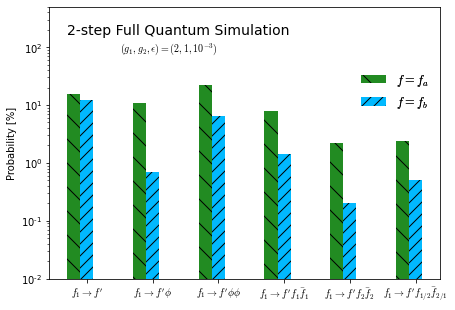

75.9
[0, 0, 0, 1.0000000000000002]
0 00 00 00 00 00 00 00 0 1001 111 101 101 00000 af2 f2 f2 3
1 00 00 00 00 00 00 00 0 1001 111 100 101 00000 af2 f1 f2 1
2 00 00 00 00 00 00 00 0 1001 100 111 100 00000 f1 af2 f1 13
3 00 00 00 00 00 00 00 0 1001 111 100 100 00000 af2 f1 f1 20
4 00 00 00 00 00 00 00 0 0001 000 001 100 00000 0 phi f1 14
5 00 00 00 00 00 00 00 0 1001 101 111 100 00000 f2 af2 f1 22
6 00 00 00 00 00 00 00 0 1001 110 100 101 00000 af1 f1 f2 17
7 00 00 00 00 00 00 00 0 0100 001 000 101 00000 phi 0 f2 6
8 00 00 00 00 00 00 00 0 1001 101 110 101 00000 f2 af1 f2 2
9 00 00 00 00 00 00 00 0 1001 101 110 100 00000 f2 af1 f1 23
10 00 00 00 00 00 00 00 0 1001 100 110 101 00000 f1 af1 f2 16
11 00 00 00 00 00 00 00 0 1001 100 110 100 00000 f1 af1 f1 69
12 00 00 00 00 00 00 00 0 1001 110 100 100 00000 af1 f1 f1 71
13 00 00 00 00 00 00 00 0 1001 111 101 100 00000 af2 f2 f1 17
14 00 00 00 00 00 00 00 0 0101 001 001 100 00000 phi phi f1 211
15 00 00 00 00 00 00 00 0 0000 000 000 101 00000 

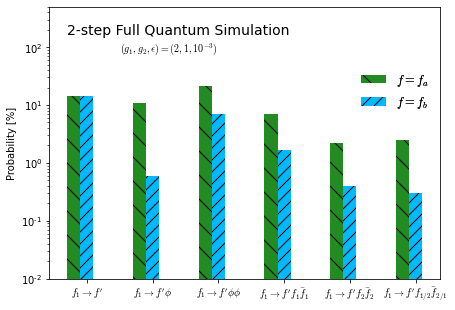

73.7
[0, 0, 0, 1.0]


In [25]:
qps2.bar_plot(counts, shots, eps, g_1, g_2)
qps22.bar_plot(counts2, shots, eps, g_1, g_2)

## Testing plus1

In [101]:
backend_sim = Aer.get_backend('qasm_simulator')

l= 3
countReg= QuantumRegister(l, 'count')
workReg= QuantumRegister(l, 'work')
control= QuantumRegister(1, 'ctrl')
ancilla= QuantumRegister(1, 'anc')
cl= ClassicalRegister(l)
level= l

qc= QuantumCircuit(control, countReg, workReg, ancilla, cl)
qc.initialize([0, 1], control)
qc.initialize([0, 0, 1, 0, 0, 0, 0, 0], countReg)

qps2.minus1(qc, l, countReg, workReg, control, ancilla, 0)
#qc.draw()

qc.measure(countReg, cl)
#qc.measure(workReg, cl)

counts= execute(qc, backend_sim, shots=10).result().get_counts()
print(counts)

{'001': 10}


## Testing numberControl

In [98]:
backend_sim = Aer.get_backend('qasm_simulator')

l= 3
countReg= QuantumRegister(l, 'count')
workReg= QuantumRegister(l, 'work')
#cl= ClassicalRegister(l)
cl= ClassicalRegister(1)

qc= QuantumCircuit(control, countReg, workReg, ancilla, cl)
qc.initialize([0, 1], control)
qc.initialize([0, 0, 0, 0, 0, 0, 0, 1], countReg)

qub= qps2.numberControl(qc, l, 2, countReg, workReg)
#qps2.numberControlT(qc, l, 4, countReg, workReg)
#qc.draw()

#qc.measure(countReg, cl)
qc.measure(qub, cl)

counts= execute(qc, backend_sim, shots=10).result().get_counts()
print(counts)

{'0': 10}


## Testing generateGraylist

In [26]:
gl= qps2.generateGrayList(1, 1)

for ele in gl:
    print(ele)
    
print(gl)

[0, [1]]
[[0, [1]]]


## Testing Qiskit's default C(n)X gate scaling

In [25]:
for N in range(2, 14):
    qc= QuantumCircuit(N)
    qc.mcx(qc.qubits[:N-1], qc.qubits[N-1])

    qc_t= compiler.transpile(qc, basis_gates=['h', 't', 'tdg', 'x', 'cx', 'ry', 'rx', 'rz', 'u1'], optimization_level= 0)
    print(qc_t.count_ops())

    
#qc_t.draw()

OrderedDict([('cx', 1)])
OrderedDict([('cx', 6), ('t', 4), ('tdg', 3), ('h', 2)])
OrderedDict([('u1', 15), ('cx', 14), ('h', 2)])
OrderedDict([('u1', 43), ('cx', 36), ('rz', 24), ('h', 18), ('rx', 16)])
OrderedDict([('u1', 93), ('cx', 92), ('h', 2)])
OrderedDict([('u1', 189), ('cx', 188), ('h', 2)])
OrderedDict([('u1', 381), ('cx', 380), ('h', 2)])
OrderedDict([('u1', 765), ('cx', 764), ('h', 2)])
OrderedDict([('u1', 1533), ('cx', 1532), ('h', 2)])
OrderedDict([('u1', 3069), ('cx', 3068), ('h', 2)])
OrderedDict([('u1', 6141), ('cx', 6140), ('h', 2)])
OrderedDict([('u1', 12285), ('cx', 12284), ('h', 2)])


## Testing execution mid circuit construction

In [93]:
backend_sim = Aer.get_backend('qasm_simulator')

q= QuantumRegister(3)
cl= ClassicalRegister(3)
qc= QuantumCircuit(q, cl)
qc.h(q[1])
qc.measure(1, 1)

counts= execute(qc, backend_sim, shots=1).result().get_counts()

print(counts)

counts2= execute(qc, backend_sim, shots=1).result().get_counts()

print(counts2)

{'010': 1}
{'010': 1}


In [109]:
ivec= np.random.randn(2**6)
ivec= ivec / np.sqrt(np.sum(ivec**2))

qc= QuantumCircuit(6)
qc.initialize(ivec, qc.qubits[:])

qc_t= compiler.transpile(qc, basis_gates=['h', 't', 'tdg', 'x', 'cx', 'ry', 'rx', 'rz', 'u1'], optimization_level= 0)
print(qc_t.count_ops())

OrderedDict([('cx', 114), ('ry', 63), ('rz', 63), ('reset', 6)])


In [109]:
backend_sim = Aer.get_backend('qasm_simulator')

cl= ClassicalRegister(4)

qc= QuantumCircuit(QuantumRegister(4), cl)
qc.x(0)
qc.x(1)
qc.measure(0, 0)
qc.measure(1, 1)

qc.x(3).c_if(cl, 3 and 2)
#qc.x(3).c_if(cl, 2)

#qc.draw()

qc.measure(2, 2)
qc.measure(3, 3)

qc.x(cl[3])
counts= execute(qc, backend_sim, shots=1).result().get_counts()
print(counts)
print(qc.count_ops())
qc.draw()

CircuitError: 'qarg is not a Qubit'

In [5]:
cList= qps2.generateParticleCounts2(qps1._ni, 2, 0)

print(cList)
for j in range(len(cList)):
    cList[j]= ''.join(str(x) for x in cList[j])
    
print(cList)

[[1, 0, 0, 1], [1, 0, 1, 0], [1, 1, 0, 0], [2, 0, 0, 2], [2, 0, 1, 1], [2, 0, 2, 0], [2, 1, 0, 1], [2, 1, 1, 0], [2, 2, 0, 0], [3, 0, 0, 3], [3, 0, 1, 2], [3, 0, 2, 1], [3, 0, 3, 0], [3, 1, 0, 2], [3, 1, 1, 1], [3, 1, 2, 0], [3, 2, 0, 1], [3, 2, 1, 0], [3, 3, 0, 0]]
['1001', '1010', '1100', '2002', '2011', '2020', '2101', '2110', '2200', '3003', '3012', '3021', '3030', '3102', '3111', '3120', '3201', '3210', '3300']


In [26]:
particles, n_tot, n_phi= qps2.history_to_counts([1, 0, 3], 1)

[2]
[2, 1]
[2, 1, 0]


In [27]:
print(particles, n_tot, n_phi)

[2, 1, 0, 0] 3 1


In [115]:
qps2.gen_h(3)
#qps2.gen_hR(l1)
#print(l1)

[[0, 0, 0],
 [0, 0, 1],
 [0, 1, 0],
 [0, 1, 1],
 [0, 1, 3],
 [1, 0, 0],
 [1, 0, 1],
 [1, 0, 2],
 [1, 1, 0],
 [1, 1, 1],
 [1, 1, 2],
 [1, 1, 3],
 [1, 2, 0],
 [1, 2, 1],
 [1, 2, 2],
 [1, 2, 3]]

In [14]:
#hmap= qps2.h_map(3, 1)
#print(hmap)
qps2.h_map(3, 1)

{(1, 0): [[0, 0, 0]],
 (2, 1): [[0, 0, 1], [0, 1, 0], [1, 0, 0]],
 (3, 2): [[0, 1, 1], [1, 0, 1], [1, 1, 0]],
 (3, 0): [[0, 1, 3], [1, 0, 2], [1, 2, 0]],
 (4, 3): [[1, 1, 1]],
 (4, 1): [[1, 1, 2], [1, 1, 3], [1, 2, 1], [1, 2, 2], [1, 2, 3]]}

In [18]:
#hmap= qps2.h_map(3, 1)
#print(hmap)
qps2.h_map(3, 1)


##for key in hmap:
#    n_tot, n_phi= key
#    for l in hmap[key]:
#        for n in l:
#            print(bin(n)[2:])
#    print(n_tot, n_phi)

{(1, 0): ['000000'],
 (2, 1): ['010000', '000100', '000001'],
 (3, 2): ['010100', '010001', '000101'],
 (3, 0): ['110100', '100001', '001001'],
 (4, 3): ['010101'],
 (4, 1): ['100101', '110101', '011001', '101001', '111001']}